# Generating Spiral Dataset

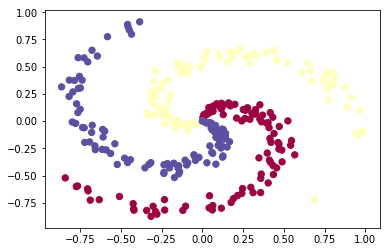

In [8]:
import numpy as np
import matplotlib.pyplot as plt
N = 100 # No of points per class
D = 2 # dimensionality
K = 3 # No of classes

X = np.zeros((N*K, D)) # data matrix - Each row corresponds to 1 example
y = np.zeros(N*K, dtype='uint8')

for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N) #radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 #theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    
# Visualizing the data

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap = plt.cm.Spectral)
plt.show()
    

# Training a Softmax Classifier

Its non linear dataset. We will use a softmax classifier. The softmax classifier has a linear score function and uses the cross entropy loss.

f(x, W) = WX+b

Li=−log(e^fy / ∑e^fj)


In [15]:
W = 0.01 * np.random.randn(D, K) #Small Random Weights To avoid saturation 
b = np.zeros((1, K))
W

array([[-0.00137078, -0.01721036, -0.00254244],
       [ 0.00414894,  0.01012352,  0.00276205]])

In [17]:
scores = np.dot(X, W) + b
scores

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.77232060e-05,  6.05612027e-05,  2.14123563e-05],
       [ 7.03766690e-05,  8.12300561e-05,  3.62144963e-05],
       [ 1.21305351e-04,  2.56818098e-04,  7.61516471e-05],
       [ 1.51006995e-04,  2.43204210e-04,  8.58054608e-05],
       [ 1.81865499e-04,  2.48159674e-04,  9.80804046e-05],
       [ 2.35854649e-04,  4.47439379e-04,  1.41962089e-04],
       [ 2.21199761e-04,  1.10032742e-04,  9.67478050e-05],
       [ 2.76996027e-04,  2.91857472e-04,  1.39262418e-04],
       [ 2.69784259e-04,  4.83595438e-05,  1.07907149e-04],
       [ 2.78618994e-04, -7.41962264e-05,  9.68484882e-05],
       [ 2.82227024e-04, -2.20698505e-04,  8.09945390e-05],
       [ 3.39583301e-04, -5.80102248e-05,  1.21850796e-04],
       [ 4.63529913e-04,  5.73542734e-04,  2.43052563e-04],
       [ 7.11229543e-05, -1.60509104e-03, -1.61726402e-04],
       [ 4.79914200e-04,  2.74617901e-04,  2.14122634e-04],
       [ 3.04688822e-04, -8.72778022e-04

# Cross Entropy Loss

In [22]:
# Calculating Loss

num_examples = X.shape[0]

# get unnormalized probabilities
exp_scores = np.exp(scores)

# normalize them for each example
denom = np.sum(exp_scores, axis = 1, keepdims = True)

probs = exp_scores/denom
probs

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333261, 0.33334022, 0.33332717],
       [0.33333592, 0.33333954, 0.33332454],
       [0.33332329, 0.33336847, 0.33330824],
       [0.33333033, 0.33336107, 0.3333086 ],
       [0.33333528, 0.33335738, 0.33330735],
       [0.33332025, 0.33339079, 0.33328896],
       [0.33335951, 0.33332246, 0.33331803],
       [0.33334699, 0.33335194, 0.33330108],
       [0.33337592, 0.33330211, 0.33332196],
       [0.33339273, 0.33327513, 0.33333214],
       [0.33341158, 0.33324394, 0.33334449],
       [0.33340171, 0.33326917, 0.33332912],
       [0.3333456 , 0.33338228, 0.33327212],
       [0.33354543, 0.3329868 , 0.33346777],
       [0.33338568, 0.33331724, 0.33329708],
       [0.33349659, 0.33310414, 0.33339928],
       [0.33346021, 0.33318338, 0.3333564 ],
       [0.33341827, 0.33327137, 0.33331036],
       [0.33350363, 0.33310887, 0.3333875 ],
       [0.33347217, 0.33317756, 0.33335027],
       [0.33371619, 0.33266287, 0.33362094],
       [0.

In [24]:
correct_logprobs = -np.log(probs[range(num_examples), y])
correct_logprobs

array([1.09861229, 1.09861446, 1.09860452, 1.09864241, 1.09862129,
       1.09860646, 1.09865153, 1.09853375, 1.09857133, 1.09848453,
       1.0984341 , 1.09837759, 1.09840719, 1.09857548, 1.09797621,
       1.09845527, 1.09812265, 1.09823172, 1.09835751, 1.09810154,
       1.09819585, 1.09746437, 1.09784953, 1.09795195, 1.09724247,
       1.09771592, 1.09716895, 1.09735043, 1.09726587, 1.09698261,
       1.09722979, 1.09699897, 1.09691744, 1.09686604, 1.09692418,
       1.0966447 , 1.09654426, 1.09660406, 1.09684047, 1.09635764,
       1.09630452, 1.09620144, 1.09637015, 1.09621661, 1.09602166,
       1.09594909, 1.09592921, 1.0958659 , 1.09612962, 1.09591045,
       1.09568163, 1.09563197, 1.09564431, 1.09556343, 1.09573926,
       1.0954485 , 1.09566347, 1.09524551, 1.09520901, 1.09553604,
       1.09582632, 1.09527525, 1.09538079, 1.09578394, 1.09493371,
       1.0953989 , 1.09627218, 1.09600224, 1.09731618, 1.09546269,
       1.09622754, 1.09634674, 1.09585064, 1.09644684, 1.09559

In [29]:
# Compute the loss: average cross-entropy loss and regularization
data_loss = np.sum(correct_logprobs)/num_examples
reg = 1e-3 # regularization strength

reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss
loss

1.0987251071169104

# Computing the analytic gradient with backpropagation

L is a function of X, W and b. So, we need to calculate - dL/dX, dL/dW, dL/db. As X is the given input, it is considered as constant and we don't need to calculate dL/dX.

f(X, W) = W.X + b

p = e^fy / ∑e^fj

Li=−log(p)

Backpropagation - 

dL/dW = dL/dp * dp/df * df/dW = dL/df * df/dW
dL/db = dL/dp * dp/df * df/db

Now,

dL/df = pk - 1

df/dW = X.T

dL/dW = np.dot(df/dW, dL/df)



In [34]:
dscores = probs
dscores[range(num_examples), y] -= 1
dscores /= num_examples


dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis = 0, keepdims=True)
dW += reg*W  # the regularization gradient


# Performing parameter update using Gradient Descent

In [37]:
step_size = 1e-0

W += -step_size * dW
b += -step_size * db


# Training a Softmax Classifier from scratch

In [43]:
# initialize parameters randomly

W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

# some hyperparametes

step_size = 1e-0
reg = 1e-3

num_examples = X.shape[0]

# Gradient Descent Loop

num_iterations = 200
for i in range(num_iterations):
    
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b
    
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True) # [N x K]
    
    
    # compute the loss: average cross entropy loss and regularization loss
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    
    if i%10 == 0:
        print("iteration %d: loss %f", i, loss)

    # compute the gradient on scores 
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    
    # backpropagate the gradient to the parameters (W, b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis = 0, keepdims = True)
    
    dW += reg*W #regularization gradient
    
    # perform a parameter update
    
    W += -step_size * dW
    b += -step_size * db

iteration %d: loss %f 0 1.0994937005537202
iteration %d: loss %f 10 0.9146278794927363
iteration %d: loss %f 20 0.8467080255719411
iteration %d: loss %f 30 0.8163949057677305
iteration %d: loss %f 40 0.8009441147639089
iteration %d: loss %f 50 0.7923459905612267
iteration %d: loss %f 60 0.7872634777770491
iteration %d: loss %f 70 0.784126292010929
iteration %d: loss %f 80 0.782126782479545
iteration %d: loss %f 90 0.7808209197298432
iteration %d: loss %f 100 0.7799517718079781
iteration %d: loss %f 110 0.7793645880317788
iteration %d: loss %f 120 0.7789631383906459
iteration %d: loss %f 130 0.7786860227062713
iteration %d: loss %f 140 0.7784932341661555
iteration %d: loss %f 150 0.7783582531470324
iteration %d: loss %f 160 0.7782632492279234
iteration %d: loss %f 170 0.7781960924609739
iteration %d: loss %f 180 0.7781484499334244
iteration %d: loss %f 190 0.7781145504277981


# Evaluating the training set accuracy

In [45]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: ', np.mean(predicted_class == y))

training accuracy:  0.5133333333333333


(-1.8744554200167722, 1.9055445799832311)

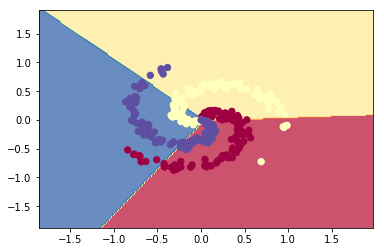

In [46]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Training a Neural Network ( Non Linear Classifier) to increase accuracy

In [57]:
# initialize parameters randomly

h = 100 # size of hidden layer

W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

In [59]:
# Forward Pass - Evaluate class scores with a 2-layer Neural Network
hidden_layer_scores = np.dot(X, W) + b
hidden_layer_op = np.maximum(0, hidden_layer_scores) # ReLu activations
scores = np.dot(hidden_layer_op, W2) + b2

In [60]:
# Calculate Loss after assing through Softmax Layer

num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
denom = np.sum(exp_scores, axis = 1, keepdims = True)
probs = exp_scores/denom

# compute the loss: average cross entropy loss and regularization loss
correct_logprobs = -np.log(probs[range(num_examples), y])
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

P1 = W.X + b

O1 = max(0, P1) = hidden_layer_op

P2 = W2.O1+b2 

P3 = e^P2 / ∑e^P2

L = −log(P3)

dL/dP2 = P3(yi) - 1 = dscores

dP2/dO1 = W2.T

First update gradient:
dL/dW2 = dL/dP2 * dP2/dW2 = dscores * O1.T = dscores * hidden_layer_op.T

dO1/dP1 = 

dP1/dW = X.T

Second update gradient:
dL/dW = dL/dP2  *  dP2/dO1  *  dO1/dP1  *  dP1/dW = dscores * W2.T * (kill where value below 0) * X.T

In [62]:
# Backward Pass

# compute the gradient on scores 
dscores = probs
dscores[range(num_examples), y] -= 1
dscores /= num_examples

# Backpropagate the gradient back to the parameters
# 1. First backprop to parameters W2 and b2
dW2 = np.dot(hidden_layer_op.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

# 2. Next backprop into hidden layer
dhidden = np.dot(dscores, W2.T)

# 3. Backprop the ReLu non-linearity
dhidden[hidden_layer_op <= 0] = 0 # At x = 0, there are lot of slopes possible. But we assume that slope is 0

# 4. Finally backprop into W, b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis = 0, keepdims=True)

# 5. Add regularization gradient
dW2 += reg * W2
dW += reg * W

In [63]:
# Perform the parameter update

W += -step_size * dW
W2 += -step_size * dW2
b += -step_size * db
b2 += -step_size * db2

# Training Neural Network Classifier From Scratch

In [65]:
# initialize the parameters randomly

h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

# some hyperparameters

step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop

num_examples = X.shape[0]
num_iterations = 10000

for i in range(num_iterations):
    
    # evaluate class scores [N x K] - Forward Pass
    hidden_layer = np.maximum(0, np.dot(X, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims=True) # [N x K]
    
    # compute the loss: average cross-entropy loss and regularization loss
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W*W)
    loss = data_loss + reg_loss
    
    if i % 1000 == 0:
        print('iteration %d: loss: %f', i, loss)
        
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores = dscores/num_examples
    
    
    # Backpropagate the gradient back to the parameters
    # 1. First backprop to parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)

    # 2. Next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)

    # 3. Backprop the ReLu non-linearity
    dhidden[hidden_layer <= 0] = 0 # At x = 0, there are lot of slopes possible. But we assume that slope is 0

    # 4. Finally backprop into W, b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis = 0, keepdims=True)

    # 5. Add regularization gradient
    dW2 += reg * W2
    dW += reg * W
        
    # Perform the parameter update
    W += -step_size * dW
    W2 += -step_size * dW2
    b += -step_size * db
    b2 += -step_size * db2

iteration %d: loss: %f 0 1.098595551158512
iteration %d: loss: %f 1000 0.24625950881804787
iteration %d: loss: %f 2000 0.1924164405490102
iteration %d: loss: %f 3000 0.18514425486346234
iteration %d: loss: %f 4000 0.18254826650592976
iteration %d: loss: %f 5000 0.18164929286817358
iteration %d: loss: %f 6000 0.18119032082798495
iteration %d: loss: %f 7000 0.1809131699711924
iteration %d: loss: %f 8000 0.18071739933292116
iteration %d: loss: %f 9000 0.1805194118685607


In [66]:
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: ', np.mean(predicted_class == y))

training accuracy:  0.99


(-1.8744554200167722, 1.9055445799832311)

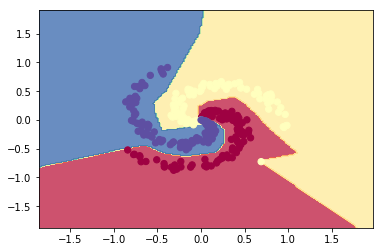

In [67]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())